In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [4]:
df.sample(10)

,v1,v2
2429,spam,Guess who am I?This is the first time I create...
4673,ham,I'm leaving my house now.
4092,ham,"\Life is nothing wen v get everything\"". But \..."
2446,ham,"Sorry, I'll call later"
5097,ham,Sorry about that this is my mates phone and i ...
662,ham,Sorry me going home first... Daddy come fetch ...
547,ham,"Sorry that took so long, omw now"
4381,ham,yeah sure thing mate haunt got all my stuff so...
2088,spam,Well done ENGLAND! Get the official poly ringt...
2504,ham,"Hello, my boytoy! I made it home and my consta..."


In [5]:
df.rename(columns={'v1' : 'target', 'v2' : 'text'}, inplace=True)
df.sample(10)

,target,text
1987,ham,No calls..messages..missed calls
3407,spam,Do you want a New Nokia 3510i colour phone Del...
5514,ham,Oh... Okie lor...We go on sat...
1722,ham,Thought praps you meant another one. Goodo! I'...
1442,ham,"Its ok., i just askd did u knw tht no?"
411,ham,Cos i want it to be your thing
564,ham,"Fuck babe ... I miss you already, you know ? C..."
903,ham,Lovely smell on this bus and it ain't tobacco...
1215,ham,that would be good ‰Û_ I'll phone you tomo lun...
1565,ham,"The &lt;#&gt; g that i saw a few days ago, th..."


In [6]:
data = df.where((pd.notnull(df)), '')
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

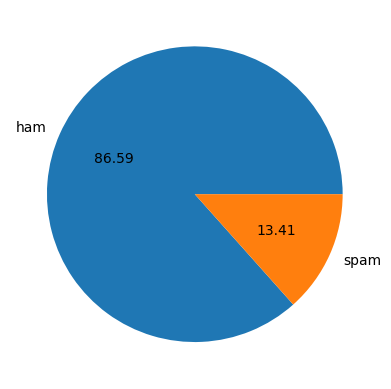

In [8]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rheyn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
X = data['text']
Y = data['target']

In [11]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
Y = encoder.fit_transform(Y).ravel()
encoder.classes_


array(['ham', 'spam'], dtype='<U4')

In [12]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object


In [13]:
print(Y)

[0 0 1 ... 0 0 0]


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=45)

In [15]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(3900,)
(1672,)


In [16]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(3900,)
(1672,)


In [17]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [18]:
model = LogisticRegression()

In [19]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [20]:
grid_search = GridSearchCV(estimator=model , param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_features, Y_train)
best_model = grid_search.best_estimator_


In [21]:
prediction_train = best_model.predict(X_train_features)
ac_train = accuracy_score(Y_train, prediction_train)
print(ac_train)

1.0


In [22]:
prediction_test = best_model.predict(X_test_features)
ac_test = accuracy_score(Y_test, prediction_test)
print(ac_test)

0.9814593301435407


In [23]:
print(f'Accuracy: {ac_test:.2f}')
print(f'Best Hyperparameters: {grid_search.best_params_}')
print('\nClassification Report:')
print(classification_report(Y_test, prediction_test))

Accuracy: 0.98
Best Hyperparameters: {'C': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1427
           1       0.99      0.88      0.93       245

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [24]:
input_mail = ["We have detected unusual activity on your account and suspect unauthorized access. To ensure the security of your account and prevent any potential misuse, we kindly request you to verify your account information immediately Please click on the link below to verify your identityFailure to verify your account within the next 24 hours will result in temporary suspension for security reasons"]

input_data = feature_extraction.transform(input_mail)
prediction = best_model.predict(input_data)

if (prediction[0]==0):
  print('HAM EMAIL : NOT SPAM')
else:
  print('SPAM EMAIL !!')
print(prediction)

SPAM EMAIL !!
[1]


In [25]:
input_mail = ["hai , im rheyno can we meet before sunrise because we need to find dragon ball"]

input_data = feature_extraction.transform(input_mail)
prediction = best_model.predict(input_data)

if (prediction[0]==0):
  print('HAM EMAIL : NOT SPAM')
else:
  print('SPAM EMAIL !!')
print(prediction)

HAM EMAIL : NOT SPAM
[0]
